In [39]:
import os

folder_path = 'data'
files = os.listdir(folder_path)

print("Files in folder:", files)


Files in folder: ['dogs_vs_cats', 'train', 'test']


In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/home/aidev/task/dogcat/data/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/home/aidev/task/dogcat/data/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [42]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [43]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(256, 256, 3)),

    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPooling2D(),

    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(),

    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)      

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 418s 666ms/step - accuracy: 0.6164 - loss: 0.6571 - val_accuracy: 0.7044 - val_loss: 0.5673
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 411s 658ms/step - accuracy: 0.7381 - loss: 0.5213 - val_accuracy: 0.7670 - val_loss: 0.4889
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 419s 670ms/step - accuracy: 0.8081 - loss: 0.4117 - val_accuracy: 0.7864 - val_loss: 0.4685
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 420s 673ms/step - accuracy: 0.8766 - loss: 0.2831 - val_accuracy: 0.7738 - val_loss: 0.6792
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 421s 674ms/step - accuracy: 0.9323 - loss: 0.1672 - val_accuracy: 0.7660 - val_loss: 0.8191
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 424s 678ms/step - accuracy: 0.9668 - loss: 0.0917 - val_accuracy: 0.7670 - val_loss: 1.0410
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 428s 685ms/step - accuracy: 0.9786 - loss: 0.0634 - val_accuracy: 0.7792 - val_loss: 1.1745
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 423s 676ms/step - accuracy: 0.9838 -

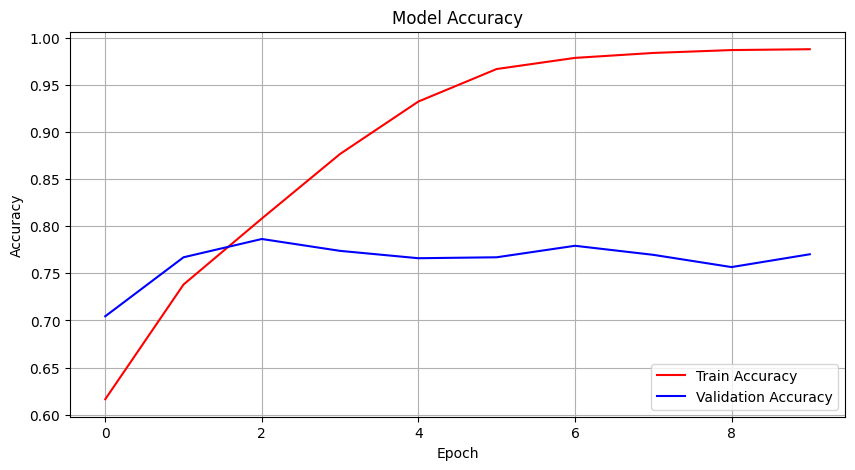

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 


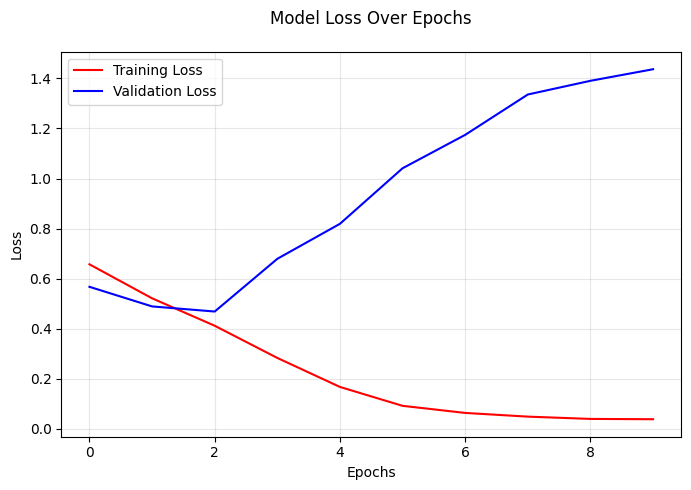

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Model Loss Over Epochs', pad=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
!pip install opencv-python

In [51]:
import cv2
print(cv2.__version__)                       

4.12.0


In [52]:
test_img=cv2.imread('cat.jpg')

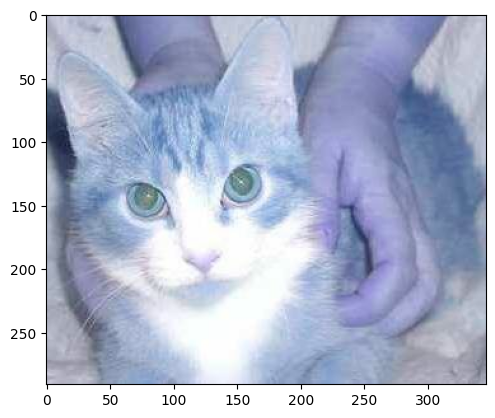

In [ ]:
plt.imshow(test_img)                                            

In [54]:
test_img.shape

(291, 346, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))                                         

In [56]:
test_input = test_img.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[0.]], dtype=float32)

In [59]:
model.save("dogcat_model.keras")
